### To run the cbgt network, see first the technical_testbench to install all the required packages and start the server 

In [1]:
#Auto reloading 
# %load_ext autoreload


# %autoreload
# %reload_ext autoreload 

In [2]:
#Removing indentation issues:
#!autopep8 --in-place --aggressive --aggressive init_params.py
#!autopep8 --in-place --aggressive --aggressive popconstruct.py
#!autopep8 --in-place --aggressive --aggressive generateepochs.py
#!autopep8 --in-place --aggressive --aggressive qvalues.py

# Compile the main simulator code using cython 

In [3]:
!python setup.py build_ext --inplace

running build_ext
running build_ext


# Import all the relevant files 

In [4]:
# Import the pipeline creation object
import pandas as pd
import numpy as np
import cbgt as cbgt
import pipeline_creation as pl_creat
import plotting_functions as plt_func
import plotting_helper_functions as plt_help
import postprocessing_helpers as post_help


import importlib

importlib.reload(plt_help)
importlib.reload(plt_func)
importlib.reload(post_help)

2023-05-20 23:34:06,991	INFO worker.py:842 -- Connecting to existing Ray cluster at address: 192.168.1.152:6379


<module 'postprocessing_helpers' from '/home/jyotika/Work/CBGTPy_release/CBGTPy/postprocessing_helpers.py'>

# Choose the experiment and create the main pipeline

In [5]:
# Choose the experiment
experiment_choice = "plastic"
number_of_choices = 3
# Call choose_pipeline with the pipeline object
pl_creat.choose_pipeline(experiment_choice)

#Create the main pipeline
pl = pl_creat.create_main_pipeline(runloop=True)

# how many simulations do you want to run ? each simulation is executed as a seperate thread

num_sims = 1

num_cores = 7
# set a seed
import time
np.random.seed(int(time.time()))
#seed = np.random.choice(np.random.randint(0,9999999,100),1)[0]
seed = 8867366
print(seed)


in choose pipeline
in reward pipeline
8867366


In [6]:
#Import core functions

# from frontendhelpers import * 
# from tracetype import *
# import qvalues as qval
# import generateepochs as gen
# from agentmatrixinit import *

# import pipeline_creation as pl_creat

# Import plotting functions
# import matplotlib.pyplot as plt

# Define the data and figure directory

data_dir = "./Data/"
figure_dir = "./Figures/"


# Running the pipeline

### 1. Default values of environment variable

In [7]:
#See init_params.py / generateepochs.py / popconstruct.py / qvalues.py
#to know the parameters contained in each of the following variables 
environment = {
    'experimentchoice': experiment_choice,
    'inter_trial_interval': None, # default = 600ms
    'thalamic_threshold': None, # default 30sp/s
    'movement_time':None,# #default sampled from N(250,1.5), ["constant",250], ["mean",250]
    'choice_timeout':None, #wait for a choice to be made, default 1000, 
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    #'dpmns' : pd.DataFrame([0.05], columns=['dpmn_wmax']),
    #'d1' : None, #D1-MSNs population related parameters (init_params.py)
    'd1': None,#pd.DataFrame([[39.5,0.055]], columns=['dpmn_alphaw','dpmn_wmax']),
    'd2': None, #pd.DataFrame([[-38.2,0.035]], columns=['dpmn_alphaw','dpmn_wmax']),
    'channels' : pd.DataFrame([["left"],["right"],["up"]], columns=['action']), #action channels related parameters (init_params.py)
    'number_of_choices':number_of_choices,
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    #'actionchannels' : pd.DataFrame([["left"],["right"]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' :None,
    'Q_support_params': None,#pd.DataFrame([[85,0.6]],columns=['dpmn_CPP_scale','q_alpha']), #initialization of Q-values update (qvalues.py) 
    'Q_df_set':pd.DataFrame([[0.5, 0.5,0.5]],columns=["left","right","up"]), #initialized Q-values df (qvalues.py)  
    'n_trials': 10, #number of trials (generateepochs.py)
    'volatility': [9,"exact"], #frequency of changepoints and type of change points (exact or poisson) (generateepochs.py)
    'conflict': (1.0, 0.0,0.0), #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.01, #std for the magnitude of the reward (generateepochs.py)
    'maxstim': 0.8, # 3 instead? how much stimulus the LIP gets at maximum
    'corticostriatal_plasticity_present':True, # whether plasticity is on or "off" at corticostriatal synapses
    'record_variables':["weight"],#"optogenetic_input"],
    'opt_signal_present':True,
    'opt_signal_probability':[6,7,8,9], # probability of trials that will get the optogenetic signal / list of trial numbers
    'opt_signal_amplitude':-0.5, # ampitude of the stop signal over base line
    'opt_signal_onset':10., # in ms
    'opt_signal_duration':500.,
    'opt_signal_channel': "all", # "all" (all channels are given the stop signal) 
    'opt_signal_population':["GPi"],
    'sustainedfraction':0.7
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signal
    
}


### Run the simulation - 1 thread with the environment variable

In [8]:
# def _run_thread_exp(i_iter):
#     import cbgt as cbgt
#     import pandas as pd
#     import numpy as np
#     import cbgt as cbgt
#     import pipeline_creation as pl_creat
#     import plotting_functions as plt_func
#     import plotting_helper_functions as plt_help
#     import postprocessing_helpers as post_help
#     # Choose the experiment
#     experiment_choice = "plastic"

#     # Call choose_pipeline with the pipeline object
#     pl_creat.choose_pipeline(experiment_choice)

#     #Create the main pipeline
#     pl = pl_creat.create_main_pipeline(runloop=True)


#     seed = np.random.choice(np.random.randint(0,9999999,100),1)[0]

#     results=cbgt.ExecutionManager(cores=1).run([pl]*1,[environment]*1)
#     return(results)

In [9]:
# from joblib import delayed, Parallel

# res = Parallel(n_jobs=3)(delayed(_run_thread_exp)(ii) for ii in range(9))

In [10]:
# pl.modulelist

In [11]:
results = cbgt.ExecutionManager(cores=num_cores).run([pl]*num_sims,[environment]*num_sims)


SpawnThreadManagers <backend.Pipeline object at 0x7f5b67e2b2b0>
(worker pid=None) in choose pipeline
(worker pid=None) in choose pipeline
(worker pid=None) conflict (1.0, 0.0)
(worker pid=None)        left  right
(worker pid=None) 0  1.001440    0.0
(worker pid=None) 1  1.014543    0.0
(worker pid=None) 2  1.007610    0.0
(worker pid=None) 3  1.001217    0.0
(worker pid=None) 4  1.004439    0.0
(worker pid=None) 5  1.003337    0.0
(worker pid=None) 6  1.014941    0.0
(worker pid=None) 7  0.997948    0.0
(worker pid=None) 8  1.003131    0.0
(worker pid=None) 9  0.991459    0.0
(worker pid=None) change points: [0 9 9]
(worker pid=None) conflict (1.0, 0.0)
(worker pid=None) conflict (1.0, 0.0)
(worker pid=None)        left  right
(worker pid=None) 0  1.001440    0.0
(worker pid=None) 1  1.014543    0.0
(worker pid=None) 2  1.007610    0.0
(worker pid=None) 3  1.001217    0.0
(worker pid=None) 4  1.004439    0.0
(worker pid=None) 5  1.003337    0.0
(worker pid=None) 6  1.014941    0.0
(wor

(worker pid=None) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=None)   Q_df = Q_df.append(
(worker pid=None) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:127: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=None)   Q_df = Q_df.append(
(worker pid=None) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=None)   Q_df = Q_df.append(
(worker pid=None) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:127: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=None)   Q_df = Q_df.append(


(worker pid=None) agent.opt_popids [0 1]
(worker pid=None) agent.opt_popids [0 1]
(worker pid=None) phasetimer 146
(worker pid=None) gateFRs [18.22222222 30.44444444]
(worker pid=None) thresholds_crossed [1]
(worker pid=None) phasetimer 146
(worker pid=None) gateFRs [18.22222222 30.44444444]
(worker pid=None) thresholds_crossed [1]
(worker pid=None) trial_num 0
(worker pid=None) chosen_action right
(worker pid=None) trial_num 0
(worker pid=None) Q_df updated
(worker pid=None) scaled dopamine signal -40.0
(worker pid=None) trial_num 0
(worker pid=None) chosen_action right
(worker pid=None) trial_num 0
(worker pid=None) Q_df updated
(worker pid=None) scaled dopamine signal -40.0
(worker pid=None) phasetimer 278
(worker pid=None) gateFRs [30.44444444 22.44444444]
(worker pid=None) thresholds_crossed [0]
(worker pid=None) phasetimer 278
(worker pid=None) gateFRs [30.44444444 22.44444444]
(worker pid=None) thresholds_crossed [0]
(worker pid=None) trial_num 1
(worker pid=None) chosen_action 

(worker pid=None) trial_num 9
(worker pid=None) chosen_action left
(worker pid=None) trial_num 9
(worker pid=None) Q_df updated
(worker pid=None) scaled dopamine signal -56.516612059502464
(worker pid=None) trial_num 9
(worker pid=None) chosen_action left
(worker pid=None) trial_num 9
(worker pid=None) Q_df updated
(worker pid=None) scaled dopamine signal -56.516612059502464


In [12]:
# List all the agent variables accessible
results[0].keys()

dict_keys(['experimentchoice', 'inter_trial_interval', 'thalamic_threshold', 'movement_time', 'choice_timeout', 'params', 'pops', 'receps', 'base', 'dpmns', 'd1', 'd2', 'channels', 'newpathways', 'Q_support_params', 'Q_df_set', 'n_trials', 'volatility', 'conflict', 'reward_mu', 'reward_std', 'maxstim', 'corticostriatal_plasticity_present', 'record_variables', 'opt_signal_present', 'opt_signal_probability', 'opt_signal_amplitude', 'opt_signal_onset', 'opt_signal_duration', 'opt_signal_channel', 'opt_signal_population', 'sustainedfraction', 'par', 'popconstruct', 'ml', 'actionchannels', 'trial_wise_movement_times', 'volatile_pattern', 'cp_idx', 'cp_indicator', 'noisy_pattern', 't_epochs', 'block', 'trial_num', 'chosen_action', 'celldefaults', 'popspecific', 'receptordefaults', 'basestim', 'dpmndefaults', 'd1defaults', 'd2defaults', 'popdata', 'pathways', 'opt_df', 'opt_channels_df', 'opt_amplitude_df', 'opt_onset_df', 'opt_populations_df', 'opt_list_trials', 'connectivity_AMPA', 'meaneff

In [13]:
results[0]['meaneff_GABA']

,GPi,GPi,STNE,STNE,GPeP,GPeP,D1STR,D1STR,D2STR,D2STR,LIP,LIP,Th,Th,FSI,LIPI
GPi,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.3315`,0.0`,0.0`,0.0`
GPi,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.3315`,0.0`,0.0`
STNE,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
STNE,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
GPeP,0.058`,0.0`,0.35`,0.0`,1.75`,1.75`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
GPeP,0.0`,0.058`,0.0`,0.35`,1.75`,1.75`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
D1STR,2.09`,0.0`,0.0`,0.0`,0.0`,0.0`,0.28`,0.0`,0.28`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
D1STR,0.0`,2.09`,0.0`,0.0`,0.0`,0.0`,0.0`,0.28`,0.0`,0.28`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
D2STR,0.0`,0.0`,0.0`,0.0`,4.07`,0.0`,0.28`,0.0`,0.28`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
D2STR,0.0`,0.0`,0.0`,0.0`,0.0`,4.07`,0.0`,0.28`,0.0`,0.28`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`


In [14]:
results[0]['conflict']

(1.0, 0.0)

In [15]:
results[0]['Q_df']

,left,right
0,0.500000,0.50000
0,0.500000,0.45000
0,0.551454,0.45000
0,0.597070,0.45000
0,0.637485,0.45000
0,0.637485,0.40500
0,0.674070,0.40500
0,0.674070,0.36450
0,0.706458,0.36450
0,0.706458,0.32805


In [16]:
#Extract all the relevant dataframes
firing_rates, reward_q_df, performance, rt_dist, total_performance = plt_help.extract_relevant_frames(results,seed)

/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_helper_functions.py:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data = Q_df_local.append(rew_df)
/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_helper_functions.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data = final_data.append(chosen_action)
/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_helper_functions.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data = final_data.append(block)
/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_helper_functions.py:144: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf = perf.append({'%_rewarded_actio

In [17]:
results[0]['popfreqs']

,GPi_left,GPi_right,STNE_left,STNE_right,GPeP_left,GPeP_right,D1STR_left,D1STR_right,D2STR_left,D2STR_right,Cx_left,Cx_right,Th_left,Th_right,FSI_common,CxI_common,Time (ms)
0,72.888889,71.555556,26.177778,25.533333,58.288889,62.111111,4.000000,2.444444,6.000000,4.444444,0.000000,0.000000,5.777778,4.888889,7.777778,0.985663,0
1,73.777778,70.888889,26.222222,25.200000,58.577778,62.355556,4.000000,2.444444,6.222222,4.444444,0.000000,0.000000,5.555556,5.111111,7.777778,0.896057,1
2,74.000000,71.555556,26.133333,25.333333,58.355556,62.044444,4.000000,2.888889,6.000000,4.888889,0.000000,0.000000,5.777778,5.333333,7.333333,0.896057,2
3,74.666667,70.222222,26.311111,25.311111,58.822222,61.800000,4.222222,2.888889,5.777778,5.111111,0.000000,0.000000,5.333333,5.555556,8.000000,0.896057,3
4,73.777778,70.666667,26.133333,25.533333,59.422222,60.644444,4.444444,3.111111,5.777778,5.333333,0.000000,0.000000,5.333333,5.777778,8.222222,0.896057,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9603,62.222222,63.111111,24.244444,26.400000,63.688889,58.866667,4.444444,6.000000,4.666667,5.333333,1.143791,0.898693,7.333333,12.222222,8.888889,1.254480,9603
9604,62.666667,64.000000,24.244444,26.600000,63.488889,59.200000,4.222222,6.000000,4.444444,5.333333,1.143791,0.980392,7.111111,12.222222,8.888889,1.254480,9604
9605,61.555556,64.222222,24.111111,26.422222,63.400000,58.955556,4.000000,6.000000,4.888889,5.333333,1.143791,0.980392,7.333333,12.000000,8.666667,1.254480,9605
9606,63.333333,63.555556,24.133333,26.266667,63.044444,59.222222,3.777778,5.777778,4.666667,5.111111,1.307190,0.980392,7.333333,12.000000,8.888889,1.254480,9606


In [18]:
# firing rates  
firing_rates[0]

,Time (ms),variable,firing_rate,nuclei,channel,seed,n_trials,volatility,volatility_type,conflict
0,0,GPi_left,72.888889,GPi,left,8867366_0,10.0,9.0,exact,"(1.0, 0.0)"
1,1,GPi_left,73.777778,GPi,left,8867366_0,10.0,9.0,exact,"(1.0, 0.0)"
2,2,GPi_left,74.000000,GPi,left,8867366_0,10.0,9.0,exact,"(1.0, 0.0)"
3,3,GPi_left,74.666667,GPi,left,8867366_0,10.0,9.0,exact,"(1.0, 0.0)"
4,4,GPi_left,73.777778,GPi,left,8867366_0,10.0,9.0,exact,"(1.0, 0.0)"
...,...,...,...,...,...,...,...,...,...,...
153723,9603,CxI_common,1.254480,CxI,common,8867366_0,10.0,9.0,exact,"(1.0, 0.0)"
153724,9604,CxI_common,1.254480,CxI,common,8867366_0,10.0,9.0,exact,"(1.0, 0.0)"
153725,9605,CxI_common,1.254480,CxI,common,8867366_0,10.0,9.0,exact,"(1.0, 0.0)"
153726,9606,CxI_common,1.254480,CxI,common,8867366_0,10.0,9.0,exact,"(1.0, 0.0)"


In [19]:
performance

,%_rewarded_actions,%_action,actions,block,seed,n_trials,volatility,volatility_type,conflict,condition
0,100.0,50.0,left,left,8867366_0,10.0,9.0,exact,"(1.0, 0.0)",GPi-Stimulation
1,0.0,40.0,right,left,8867366_0,10.0,9.0,exact,"(1.0, 0.0)",GPi-Stimulation
2,0.0,10.0,left,right,8867366_0,10.0,9.0,exact,"(1.0, 0.0)",GPi-Stimulation


In [20]:
recorded_variables = post_help.extract_recording_variables(results,results[0]['record_variables'],seed)

In [21]:
recorded_variables['weight']

,weights,trials,nuclei,seed
0,0.014614,0,D1-left,8867366_0
1,0.035680,1,D1-left,8867366_0
2,0.054807,2,D1-left,8867366_0
3,0.055000,3,D1-left,8867366_0
4,0.053165,4,D1-left,8867366_0
5,0.053840,5,D1-left,8867366_0
6,0.049739,6,D1-left,8867366_0
7,0.052384,7,D1-left,8867366_0
8,0.050471,8,D1-left,8867366_0
0,0.017214,0,D2-left,8867366_0


In [22]:
# recorded_variables['optogenetic_input']

<AxesSubplot:xlabel='trials', ylabel='weights'>

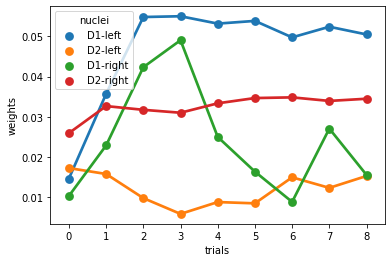

In [23]:
import seaborn as sns
import pylab as pl
sns.pointplot(x="trials",y="weights",hue="nuclei",data=recorded_variables['weight'])


In [24]:
# pl.figure()
# sns.lineplot(x="Time(ms)",y="D1STR_left",data=recorded_variables['optogenetic_input'],hue='seed')

In [25]:
# Relevant reward_dataframe
reward_q_df[0]

,level_0,index,Trials,variable,value,data_type,seed,n_trials,volatility,volatility_type,conflict,condition
0,0,11,0,left,0.500000,Q_df,8867366_0,10.0,9.0,exact,"(1.0, 0.0)",GPi-Stimulation
1,1,12,1,left,0.500000,Q_df,8867366_0,10.0,9.0,exact,"(1.0, 0.0)",GPi-Stimulation
2,2,13,2,left,0.551454,Q_df,8867366_0,10.0,9.0,exact,"(1.0, 0.0)",GPi-Stimulation
3,3,14,3,left,0.597070,Q_df,8867366_0,10.0,9.0,exact,"(1.0, 0.0)",GPi-Stimulation
4,4,15,4,left,0.637485,Q_df,8867366_0,10.0,9.0,exact,"(1.0, 0.0)",GPi-Stimulation
...,...,...,...,...,...,...,...,...,...,...,...,...
57,5,5,5,left,0.000000,block,8867366_0,10.0,9.0,exact,"(1.0, 0.0)",GPi-Stimulation
58,6,6,6,left,0.000000,block,8867366_0,10.0,9.0,exact,"(1.0, 0.0)",GPi-Stimulation
59,7,7,7,left,0.000000,block,8867366_0,10.0,9.0,exact,"(1.0, 0.0)",GPi-Stimulation
60,8,8,8,left,0.000000,block,8867366_0,10.0,9.0,exact,"(1.0, 0.0)",GPi-Stimulation


In [26]:
performance

,%_rewarded_actions,%_action,actions,block,seed,n_trials,volatility,volatility_type,conflict,condition
0,100.0,50.0,left,left,8867366_0,10.0,9.0,exact,"(1.0, 0.0)",GPi-Stimulation
1,0.0,40.0,right,left,8867366_0,10.0,9.0,exact,"(1.0, 0.0)",GPi-Stimulation
2,0.0,10.0,left,right,8867366_0,10.0,9.0,exact,"(1.0, 0.0)",GPi-Stimulation


In [27]:
# Extract the data tables from the agent
datatables = cbgt.collateVariable(results,'datatables')
datatables[0]["decisiondurationplusdelay"]-datatables[0]["decisionduration"]

0    254
1    252
2    252
3    254
4    254
5    250
6    252
7    251
8    251
9    252
dtype: object

In [28]:
datatables[0]

,decision,stimulusstarttime,decisiontime,decisionduration,decisiondurationplusdelay,rewardtime,correctdecision,reward
0,right,0,146,146,400,400,left,0.0
1,left,1001,1279,278,530,1531,left,1.0
2,left,2132,2249,117,369,2501,left,1.0
3,left,3102,3205,103,357,3459,left,1.0
4,right,4060,4183,123,377,4437,left,0.0
5,left,5038,5165,127,377,5415,left,1.0
6,right,6016,6062,46,298,6314,left,0.0
7,left,6915,6960,45,296,7211,left,1.0
8,right,7812,7856,44,295,8107,left,0.0
9,left,8708,8754,46,298,9006,right,0.0


In [29]:
# Check the Q-values data frame
results[0]['Q_df']

,left,right
0,0.500000,0.50000
0,0.500000,0.45000
0,0.551454,0.45000
0,0.597070,0.45000
0,0.637485,0.45000
0,0.637485,0.40500
0,0.674070,0.40500
0,0.674070,0.36450
0,0.706458,0.36450
0,0.706458,0.32805


In [31]:
postfix = "weak_GPi_inh"

In [32]:
#Save the selected variables of results in the data_dir specified
cbgt.saveResults(results,data_dir+'network_data_'+postfix+'_'+str(seed)+'.pickle',['popfreqs','popdata','Q_support_params','d1','d2','dpmns','datatables'])
# import os
# os.mkdir(data_dir+str(seed))
# for i in np.arange(len(firing_rates)):
#     firing_rates[i]["seed"] = str(seed)+"_"+str(i)
#     reward_q_df[i]["seed"] = str(seed)+"_"+str(i)
# #     rt_dist[i]["seed"] = str(seed)+"_"+str(i)
# #     total_performance[i]["seed"] = str(seed)+"_"+str(i)
# firing_rates1 = pd.concat(firing_rates)
# reward_q_df1 = pd.concat(reward_q_df)
# firing_rates1.to_csv(data_dir+"/"+str(seed)+"/firing_rates.csv")
# reward_q_df1.to_csv(data_dir+"/"+str(seed)+"/reward_df.csv")
# performance.to_csv(data_dir+"/"+str(seed)+"/performance.csv")
# rt_dist.to_csv(data_dir+"/"+str(seed)+"/rt_dist.csv")
#                     , reward_q_df, performance, rt_dist, total_performance

In [33]:
firing_rates[0].to_csv(data_dir+"firing_rates_"+postfix+".csv")
reward_q_df[0].to_csv(data_dir+"reward_df_"+postfix+".csv")
performance.to_csv(data_dir+"performance_"+postfix+".csv")
rt_dist.to_csv(data_dir+"rt_dist_"+postfix+".csv")
total_performance.to_csv(data_dir+"total_performance_"+postfix+".csv")

In [34]:
reward_q_df

[    level_0  index  Trials variable     value data_type       seed  n_trials  \
 0         0     11       0     left  0.500000      Q_df  8867366_0      10.0   
 1         1     12       1     left  0.500000      Q_df  8867366_0      10.0   
 2         2     13       2     left  0.551454      Q_df  8867366_0      10.0   
 3         3     14       3     left  0.597070      Q_df  8867366_0      10.0   
 4         4     15       4     left  0.637485      Q_df  8867366_0      10.0   
 ..      ...    ...     ...      ...       ...       ...        ...       ...   
 57        5      5       5     left  0.000000     block  8867366_0      10.0   
 58        6      6       6     left  0.000000     block  8867366_0      10.0   
 59        7      7       7     left  0.000000     block  8867366_0      10.0   
 60        8      8       8     left  0.000000     block  8867366_0      10.0   
 61        9      9       9    right  1.000000     block  8867366_0      10.0   
 
     volatility volatility

In [35]:
# import seaborn as sns
# import matplotlib.pyplot as plt 
# for i in np.arange(len(results)):
#     weights = np.array(results[i]['agent'].hist_w)
#     weights[0]
#     np.shape(weights)
#     reshaped_wts = weights.reshape(len(weights),4)
#     nuc_list = ['D1-left','D2-left','D1-right','D2-right' ]
#     ind_list = [(0,0),(0,1),(1,0),(1,1)]
#     weights_df = pd.DataFrame(columns=["weights","trials","nuclei"])

#     for j in np.arange(4):
#         temp = pd.DataFrame()
#         temp["weights"] = [ np.mean(reshaped_wts[:,j][datatables[0]['stimulusstarttime'][i]:datatables[0]['stimulusstarttime'][i+1]])   for i in np.arange(len(datatables[0])-1) ]
#         #temp["weights"] = [ weights[:,ind_list[j][0],ind_list[j][1],:,:][datatables[0]['stimulusstarttime'][i]:datatables[0]['stimulusstarttime'][i+1]])   for i in np.arange(len(datatables[0])-1) ]
#         temp["trials"] = np.arange(0,len(datatables[0])-1)
#         temp["nuclei"] = nuc_list[j]
#         weights_df = weights_df.append(temp)
    
#    #weights_df.to_csv(data_dir+"Weights_"+str(seed)+".csv")
#     fig,ax = plt.subplots(1,1,figsize=(16,9))
#     sns.pointplot(x="trials",y="weights",hue="nuclei",data=weights_df,ax=ax)
    #fig.savefig(figure_dir+"Weights_"+str(seed)+"_"+str(i)+".png")    

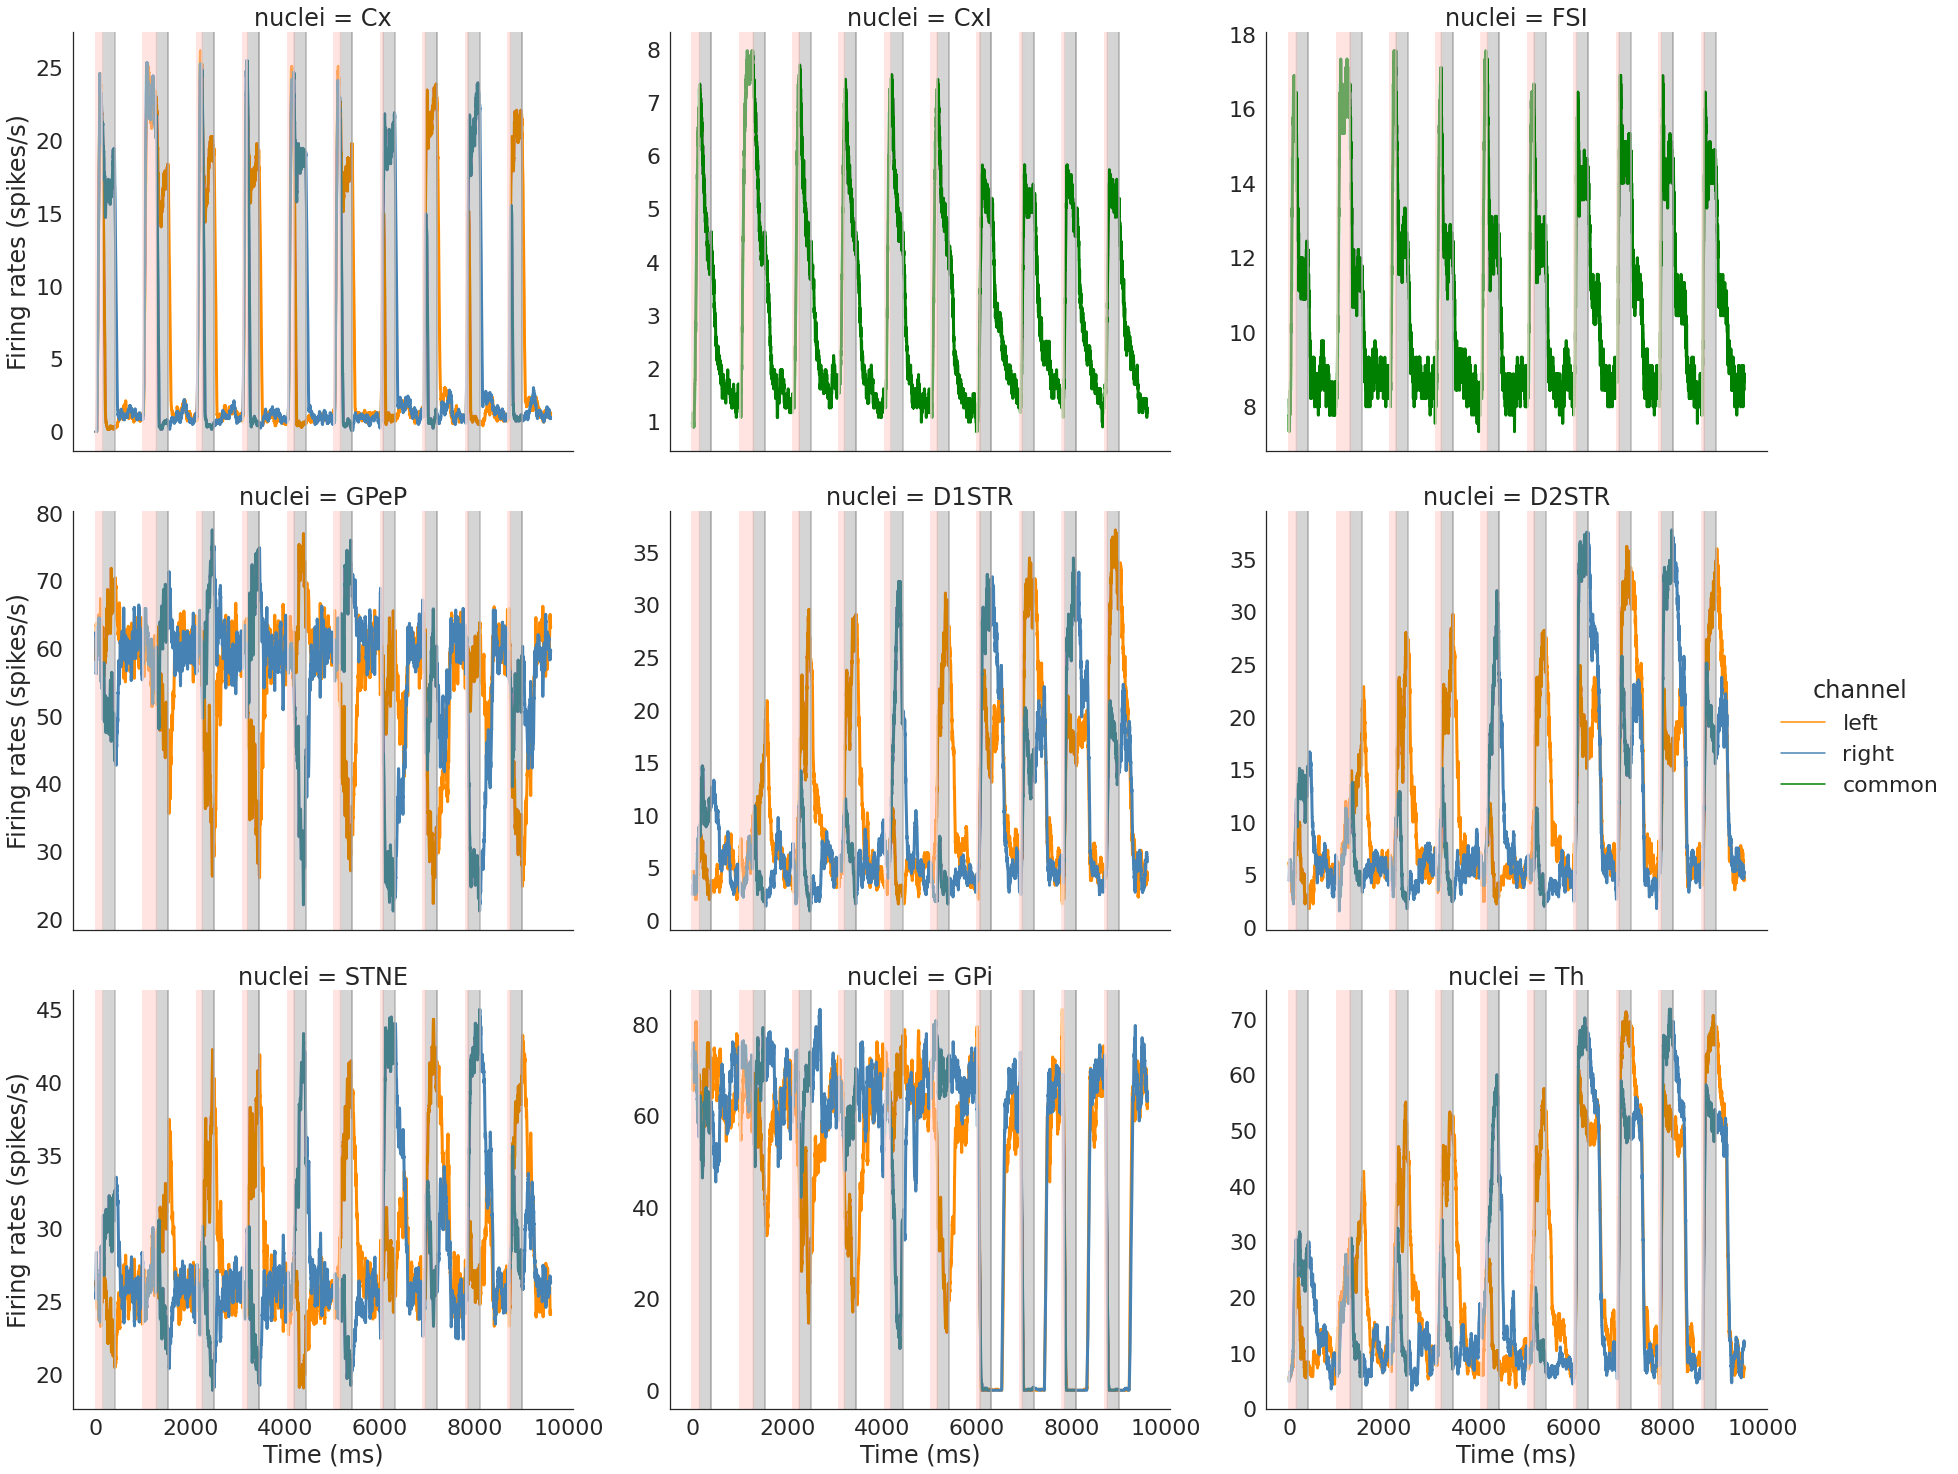

In [36]:
# Plot the firing rates extracted, figure handles are returned in fig_handles

FR_fig_handles = plt_func.plot_fr(firing_rates,datatables)
FR_fig_handles[0].savefig(figure_dir+"Example_FR_"+postfix+".png",dpi=300)

In [ ]:
# FR_fig_handles[0].savefig(figure_dir+"Example_FR_intact.png",dpi=300)

In [ ]:
FR_fig_handles_zoom = plt_func.plot_fr_flex(firing_rates[0],datatables[0],['all'], [], (0, 500)) 

In [ ]:
reward_fig_handles = plt_func.plot_reward_Q_df(reward_q_df)

In [ ]:
# inp = np.array(results[0]['agent'].inp)

# fig,ax = pl.subplots(1,2,figsize=(12,9))
# ax[0].plot(inp[:,0],label='Ctx-left-input')
# ax[0].plot(inp[:,1],label='Ctx-right-input')
# ax[0].legend()
# ax[1].plot(popfreqs[i].iloc[:,10],label="Ctx-left-activity",color='r')
# ax[1].plot(popfreqs[i].iloc[:,11],label="Ctx-right-activity",color='g')
# ax[1].plot(popfreqs[i].iloc[:,15],label="Ctx-inhibition",color='c')
# ax[1].legend()
# fig.savefig(figure_dir+"Input_vs_activity_lip"+str(seed)+".png")

In [ ]:
# for i in np.arange(len(results)):
#     fig,ax = plt.subplots(2,3,figsize=(24,16))
#     print(ax)
#     stim_on = datatables[i]["stimulusstarttime"]
#     decision_time = datatables[i]["decisiontime"]
#     weights = np.array(results[i]['agent'].hist_w)
#     Wts = pd.DataFrame.from_records(np.array(results[i]['agent'].hist_w).reshape(len(weights),4),columns=nuc_list)
#     ax[0][0].plot(popfreqs[i].iloc[:,0],label="GPi-left")
#     ax[0][0].plot(popfreqs[i].iloc[:,1],label="GPi-right")

#     ax[0][1].plot(popfreqs[i].iloc[:,12],label="Th-left")
#     ax[0][1].plot(popfreqs[i].iloc[:,13],label="Th-right")
    
#     ax[0][2].plot(popfreqs[i].iloc[:,10],label="Ctx-left")
#     ax[0][2].plot(popfreqs[i].iloc[:,11],label="Ctx-right")

    
#     ax[1][0].plot(popfreqs[i].iloc[:,6],label="D1-left")
#     ax[1][0].plot(popfreqs[i].iloc[:,7],label="D1-right")
#     for k in nuc_list:
#         ax[1][1].plot(Wts[k],label=k)

#     for a in np.hstack(ax):
#         ylims = a.get_ylim()
#         for s,d in zip(stim_on,decision_time):
#             a.vlines(x=s,ymin=ylims[0],ymax=ylims[1],color='k',lw=1.0,ls="solid")
#             a.vlines(x=d,ymin=ylims[0],ymax=ylims[1],color='k',lw=1.0,ls="dashed")
#             a.set_ylim(ylims[0],ylims[1])
#         a.set_xlim(0,3000)
#         a.legend()
#     fig.subplots_adjust(left=0.06,bottom=0.06,right=0.96,top=0.96)
#     fig.savefig(figure_dir+"Zoomed_in_activity_"+str(seed)+"_"+str(i)+".png")